<a href="https://colab.research.google.com/github/mandeebot/new_new/blob/main/main_pissa_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - PISA DATA EXPLORATION


## by Mandieng Bot

## Introduction
> PISA is a worldwide study by OECD in member and non-member nations intended to evaluate educational systems by measuring 15-year-old students scholastic performance on mathematics, science, and reading.

In this Data Visualization Project, I'm going to present the students maths behavior per country based on PISA-defined variables



## Preliminary Wrangling

My Data cleaning process can be found [here](https://github.com/mandeebot/new_new/blob/main/pisa-data-cleaning-note.ipynb).

This dataset contains information from 485,490 students and 646 features.
Due low computing resources and the size of the dataset,moving further i will further categorize and streamline the dataset into these categorise for easy analysis


>Student Information
- CNT: Country
- ST04Q01: Gender

>Motivation
- ST29Q02: Worthwhile for Work
- ST29Q05: Worthwhile for Career Chances
- ST29Q07: Important for Future Study
- ST29Q08: Helps to Get a Job

>Interest
- ST29Q01: Enjoy Reading
- ST29Q03: Look Forward to Lessons
- ST29Q04: Enjoy Maths
- ST29Q06: Interested in Maths

>Behaviour
- ST49Q03: (Extracurricular) Activity
- ST49Q04: Participate in Competitions
- ST49Q05: Study More Than 2 Extra Hours a Day
- ST49Q06: Play Chess
- ST49Q07: Computer programming
- ST49Q09: Participate in Math Club

>Performance
- 'ST01Q01': 'internationalGrade'
- 'PV1MATH': 'MathScore',
- 'PV1READ': 'ReadScore',
- 'PV1SCIE': 'ScienceScore'

For the categorise, i further encoded the categorical values in each category(except the performance category), sumed them up ad average out the scores to have one single category score to represent each  category of features, further cutting down the number of features i have to work with.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style('whitegrid')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
data = pd.read_csv('fdata_cleaned')
data.head(2)

,Unnamed: 0,country,birthYear,gender,internationalGrade,talkAboutMaths,helpFriendsMaths,extracurricularActivity,participateInCompetitions,studyMoreThan2ExtraHoursADay,...,ProblemSolvingSeekExplanations,ProblemSolvingCanLinkFacts,ProblemSolvingLikeSolveComplexProblems,MathScore,ReadScore,ScienceScore,motivation,interest,behaivior,prob_solv_skills
0,105097,Switzerland,1996,Male,10,Sometimes,Sometimes,2.0,1.0,2.0,...,4.0,4.0,4.0,492.1405,392.9348,426.2775,3.50,3.25,1.333333,3.8
1,270652,Italy,1996,Male,10,Never or rarely,Sometimes,1.0,3.0,2.0,...,2.0,2.0,5.0,533.7358,506.8110,515.4233,3.25,2.75,2.000000,3.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71281 entries, 0 to 71280
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               71281 non-null  int64  
 1   country                                  71281 non-null  object 
 2   birthYear                                71281 non-null  int64  
 3   gender                                   71281 non-null  object 
 4   internationalGrade                       71281 non-null  int64  
 5   talkAboutMaths                           45988 non-null  object 
 6   helpFriendsMaths                         45911 non-null  object 
 7   extracurricularActivity                  45780 non-null  float64
 8   participateInCompetitions                45841 non-null  float64
 9   studyMoreThan2ExtraHoursADay             45850 non-null  float64
 10  playChess                                45865

In [6]:
data.shape

(71281, 33)

In [7]:
#change datatypes
data.gender = data.gender.astype('category')
data.country = data.country.astype('category')
data.birthYear = data.birthYear.astype('category')

# fix inconsistent formatting in country name
data.country = data.country.apply(lambda x: x.strip())

# test that formatting was successful
print(type(data.gender[5]))
print(type(data.birthYear[70]))
print(type(data.country[4]))
print('incosistency in country nameing fixed \b : ',(data.country == 'United States of America ').sum())

<class 'str'>
<class 'numpy.int64'>
<class 'str'>
incosistency in country nameing fixed  :  0


In [8]:
#creating new feature
# calculate an academic average for each student
data['academic_avg'] = (data.MathScore + data.ReadScore + data.ScienceScore)/3


In [9]:
data = data[['country','birthYear','gender','internationalGrade','motivation','interest','behaivior',
             'prob_solv_skills','MathScore','ReadScore','ScienceScore','academic_avg']]
data.head(2)

,country,birthYear,gender,internationalGrade,motivation,interest,behaivior,prob_solv_skills,MathScore,ReadScore,ScienceScore,academic_avg
0,Switzerland,1996,Male,10,3.50,3.25,1.333333,3.8,492.1405,392.9348,426.2775,437.1176
1,Italy,1996,Male,10,3.25,2.75,2.000000,3.2,533.7358,506.8110,515.4233,518.6567


In [10]:
data.describe()

,internationalGrade,motivation,interest,behaivior,prob_solv_skills,MathScore,ReadScore,ScienceScore,academic_avg
count,71281.000000,45843.000000,45694.000000,45211.000000,45305.000000,71281.000000,71281.000000,71281.000000,71281.000000
mean,9.822197,2.995692,2.450371,1.554780,2.480896,469.410045,471.619863,475.438868,472.156258
std,3.788388,0.740231,0.779827,0.577280,0.818538,103.394999,102.721924,101.571752,98.363144
min,7.000000,1.000000,1.000000,1.000000,1.000000,85.846700,0.083400,20.179000,60.042400
25%,9.000000,2.500000,2.000000,1.166667,2.000000,395.162800,402.798600,404.270800,402.916333
50%,10.000000,3.000000,2.500000,1.333333,2.400000,465.734500,475.160300,475.233100,471.917200
75%,10.000000,3.500000,3.000000,1.833333,3.000000,540.979900,543.700500,547.127900,541.628567
max,96.000000,4.000000,4.000000,4.000000,5.000000,924.840300,889.258700,840.861600,845.848700


### What is the structure of your dataset?

> The data contains over 400,000 responses with over 600 variables. The variables are a variety of formats: nominal and ordinal categorical, discrete and continuous quantitative, and plain text. Due to the large size of the dataset however, we will be working with just a sample of 97098 data observations from the data set

### What is/are the main feature(s) of interest in your dataset?

> For this Project, the main features of interest is centered round the  student; the student demographic, the students Maths interest, the student's motivation, student's study behaivior and student's performances in Science, Reading and Maths

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The summary variables in the data set combine similar measures of student information into a single quantitative or categorical value. This allows for direct comparison between countries and students for analysis. The following variables will be used:

- Student Demographics
identification (STIDSTD)
- country of residence (OECD, NC)
- gender (ST04Q01)
- students academic performance (PV1MATH, PV1READ, PV1SCIE)
- Maths interests measurements (ST29Q06, ST29Q04, ST29Q06, ST29Q01, ST49Q01,ST49Q02)
- motivation (ST29Q02, ST29Q05, ST29Q07,ST29Q08)
- Students extracurricullar behaivior (ST49Q03, ST49Q04, ST49Q05, ST49Q06,ST49Q07,ST49Q09)
- students Problem solving skills (ST94Q05, ST94Q06, ST94Q09, ST94Q10, ST94Q14)


## Univariate Exploration

Will Start off my analysis with exploring the International grade feature  

We start off our univariate analysis by examig the distributio of the grades feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


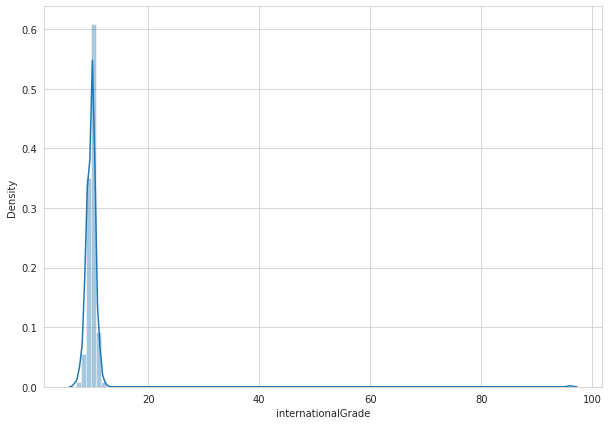

In [11]:
#examine the distribution of the international grade feature
plt.figure(figsize=(10,7))
sb.distplot(data['internationalGrade'],bins=100);

In [12]:
data['internationalGrade'].value_counts()

10    38550
9     22226
11     5803
8      3520
7       533
12      515
96      132
13        2
Name: internationalGrade, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


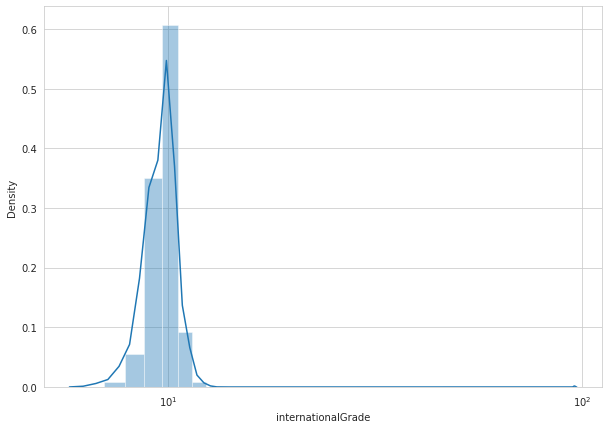

In [13]:
#putting a log function 
plt.figure(figsize=(10,7))
sb.distplot(data['internationalGrade'],bins=100);
plt.xscale('log')
plt.savefig('grade.png')

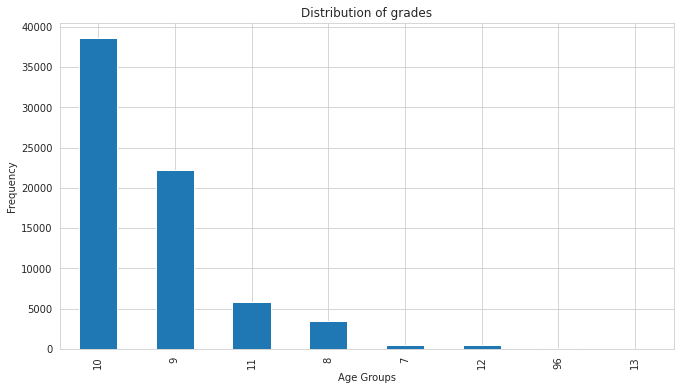

In [14]:
#plot distribution of international grade
plt.figure(figsize = (11,6))
data['internationalGrade'].value_counts().plot(kind='bar')
plt.title("Distribution of grades")
plt.xlabel("grades")
plt.ylabel("Frequency");

looking at the distribution we see a spike in the frequency of the grades that fall within 9 to 11, which goes to show that a large portion of the students grades fall withi 9 to 11, with 10 being the most frequent grade from our sample

Next we explore the distribution of the  gender feature

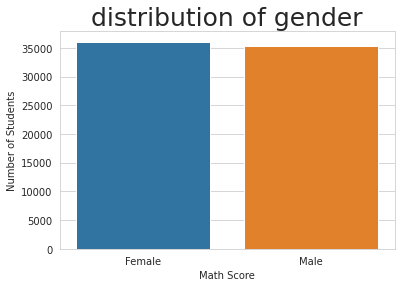

In [15]:
#plt.figure(figsize=[12,6])
sb.countplot(data= data,x='gender')
plt.title('distribution of gender', size=25)
plt.xlabel('Math Score')
plt.ylabel('Number of Students');

#lt.savefig('hist_score_overall.png')

From the plot we ca easily point out, that there isn't much difference in the distribution of the two genders in our sample. so we have a pretty balanced dataset in terms of gender.

We examine the the distributio of birthyear feature

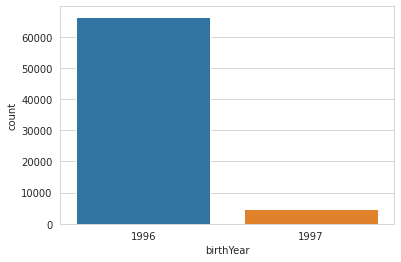

In [16]:
#distribution of the birthyear
sb.countplot(data=data,x='birthYear')

In [17]:
data.birthYear.unique()

[1996, 1997]
Categories (2, int64): [1996, 1997]

looking at the visualizatio above, a large portion of the sample drawn are having birth year 1996, this could either mean that most of the students are age-mates, our data sample is simply poor in terms of variety of birthyear

Moving further in our analysis, we'ill now explore the distribution of the countries invovled, by looking at the Top 10 countries with the highest number of students involved

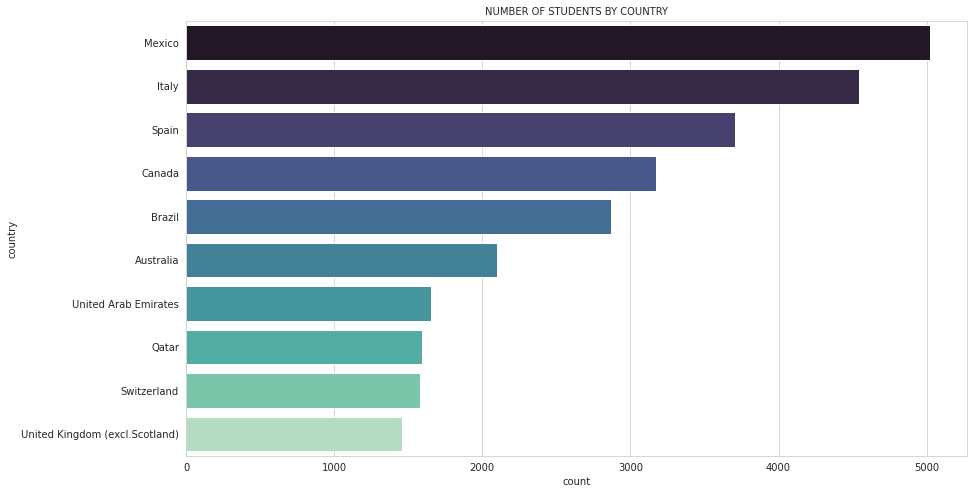

In [32]:
#top 10 countries with the highest number of students
order= data['country'].value_counts().index

plt.figure(figsize=[14,8])
sb.countplot(data=data,y='country',order=order[:10],palette='mako')
plt.title('NUMBER OF STUDENTS BY COUNTRY',size=10);

In [19]:
order[-10:]

CategoricalIndex(['New Zealand', 'Poland', 'Tunisia', 'France', 'Latvia',
                  'Netherlands', 'Iceland', 'United Kingdom (Scotland)',
                  'Perm (Russian Federation)', 'Liechtenstein'],
                 categories=['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', ...], ordered=False, dtype='category')

Looking at the visualizatio above, Mexico seems to have the highest number of studets involved, closely followed by italy with Spain coming 3rd respectively.
The country with the least amount of studet involvement from our sample remains Liechtenstien

Next we explore the distributions of the features motivation, behaivior, interest and problem solving skills

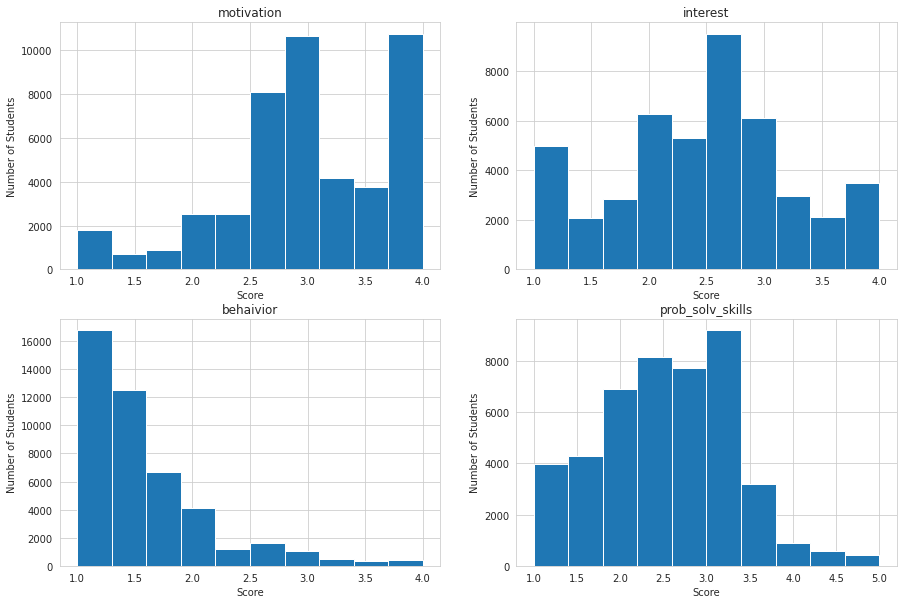

In [20]:
#Subsection drive
st_drive=['motivation','interest','behaivior','prob_solv_skills']

fig, ax= plt.subplots(nrows=2,ncols=2,figsize=[15,10])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/5,1/4,1/5]

ax=ax.flatten()
i=0

for feature in st_drive:
    #bins = np.arange(min(data[feature]), max(data[feature]) + binsizes[i], binsizes[i])
    ax[i].hist(data=data, x=feature)#,bins=bins)
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feature)
    i+=1

under the motivation feature, it looks like the graph is slighly skewed to the left with spikes at point

Interest feature seems a bit bimodal, but it indicates a general interest in maths activities like 

behavior is positively skewed, highlighting  that most students do not take extra actions towards Mathematics such as taking about math with friends, play chess, or computer programming

Problem solving skills feature

We move on to explore the distributions of the scores of Maths, Science ad Reading

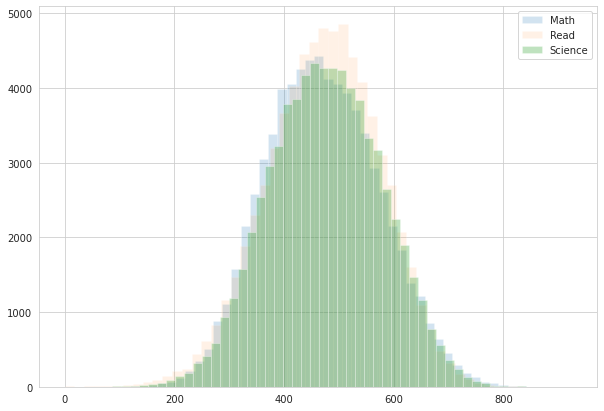

In [27]:
#exploring the distributions of the scores of maths, reading and science
import pylab as plt

plt.figure(figsize=(10,7))
plt.hist(data.MathScore,bins=50, alpha=0.2,label='Math')
plt.hist(data.ReadScore,bins=50, alpha=0.1, label='Read')
plt.hist(data.ScienceScore,bins=50, alpha=0.3, label='Science')
plt.legend(loc='upper right');

All three evaluations of scores of Maths,Reading and Science are somewhat Normally distributed with centers around 470.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the iternatioal grade feature, due to the presence of an outlier, i applied a log transform to zoom into the data and focus on the information that matters
> Mexico, italy and Spain are the countries with a high number of students in the sample

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the new operation performed ont he data will is the new feature created, average score, which is the avaerage of students performace across Maths, Reading and Science
> 

## Bivariate Exploration

>We start of by looking at the relationship between the gender feature and the grade.

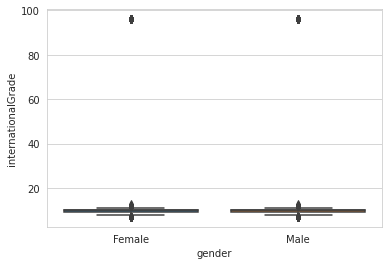

In [22]:
#gender vs international grade
sb.boxplot(data=data,x='gender',y='internationalGrade');

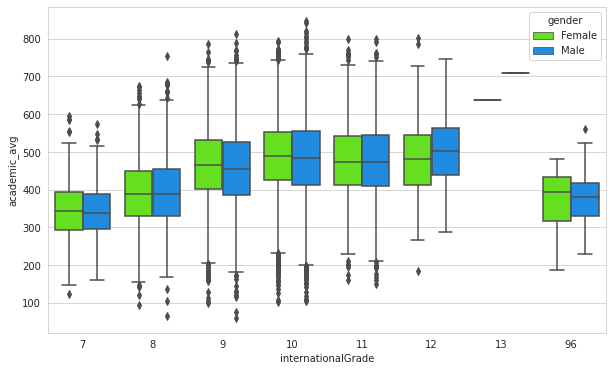

In [23]:
#sb.boxplot(data=data,x='gender',y='academic_avg');
plt.figure(figsize=(10, 6))
sb.boxplot(
    data=data, x="internationalGrade", y="academic_avg",hue='gender', palette="gist_rainbow"
)
plt.show()

A look at the relatioship between these two features, depicts some form of positive relationship between the academic average of students and the students' grade, this makes actual sense, as one would expect to see a higher average score being synonimous with having a high grade. Comparing the average score by gender also depicts that on average male tend to perform a little better than females, though the differences in performaces isn't very much significant
 

Next we explore the avearge performance of student by the country. 

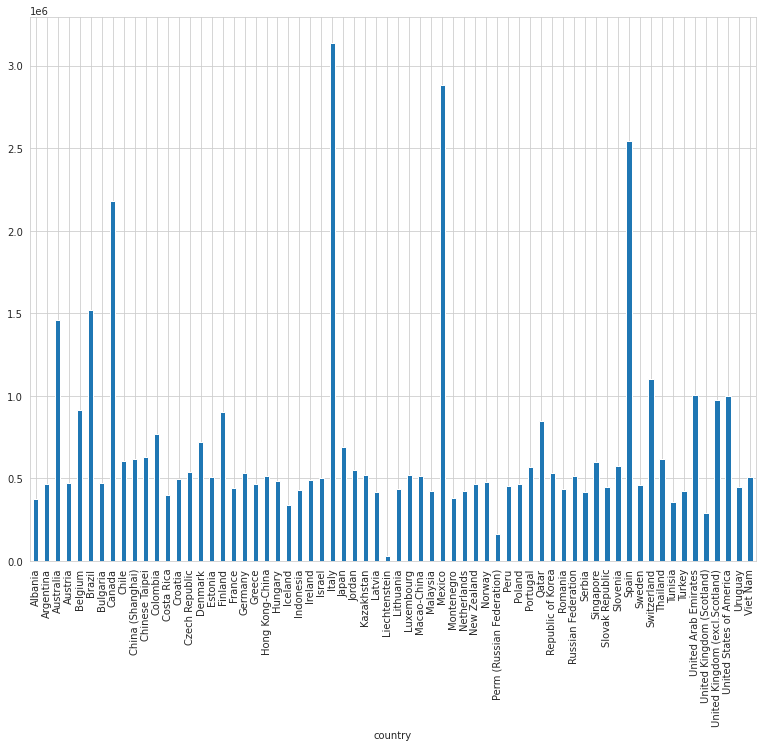

In [ ]:
#country vs studets average performance
plt.figure(figsize=(13,10))
data.groupby('country')['academic_avg'].sum().plot(kind='bar')

from the visualizatio above, italy seems to top country in terms of student's performance on average, followed by Mexico, the Spain then Canada.

Now lets explore the distribution of students academic performance in Maths, Reading and in Science

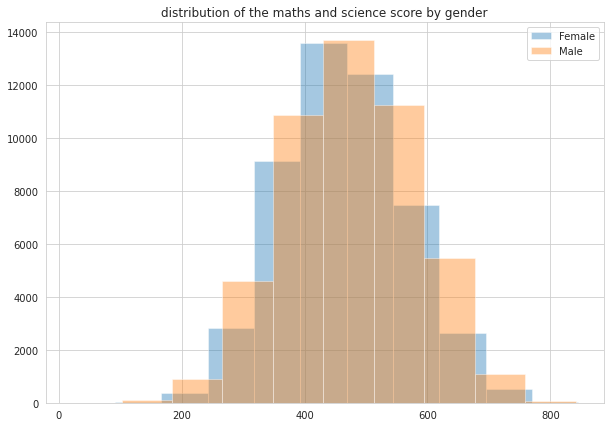

In [ ]:
#bins=np.arange(min(data['score_overall']),max(data['score_overall'])+binsize, binsize)
plt.figure(figsize=(10,7))
binsize=25
plt.title('distribution of the maths and science score by gender')
plt.hist(data=data.query('gender=="Female"'),x='MathScore', alpha=.4,label='Female')
plt.hist(data=data.query('gender=="Male"'),x='ScienceScore', alpha=.4, label='Male')

plt.legend();

Distribution of the maths and science features versus student's gender is quite normal, with centers around 500

Now lets analyse the distribution of the student's performances in Reading, Maths and Sciences by their gender.

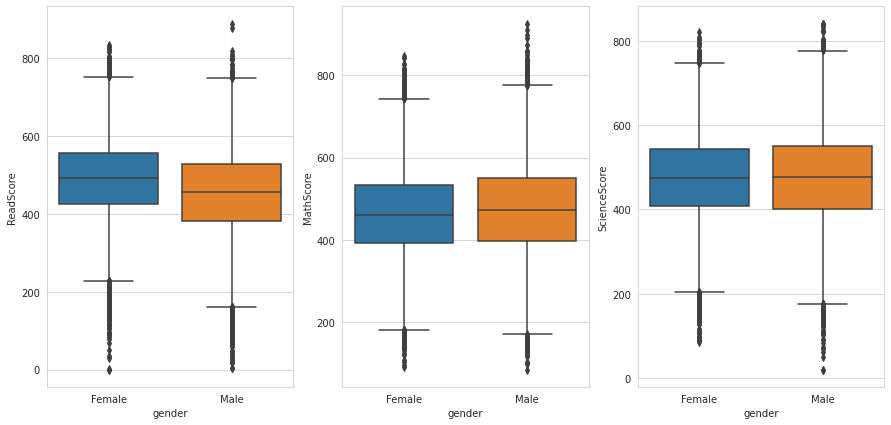

In [ ]:
# graph the distribution of math performance according to gender

plt.figure(figsize=(15,7))
plt.subplot(131)
sb.boxplot(data=data, y='ReadScore', x='gender')
plt.subplot(132)
sb.boxplot(data=data, y='MathScore', x='gender')
plt.subplot(133)
sb.boxplot(data=data, y='ScienceScore', x='gender')

fig.tight_layout()
plt.savefig('perfomance.png')

Looking at the plot of students performances above; in terms of reading we can see that females tend to score higher in ranges than their male counters

A look at the maths score tells a different story; here we see that males tend to perform better than females
lastly in sciences, the differences are not that sigificant

Now we explore the distributions of the scores in student's motivation, interest, problem solvig skills and behaivior(extraculular activites)

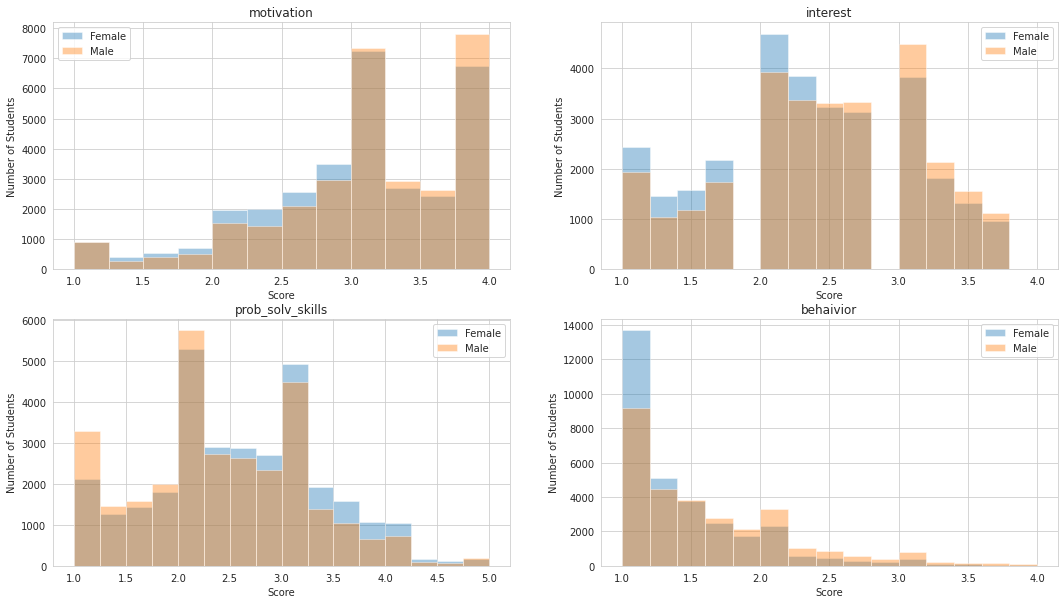

In [ ]:
#creating a Subsection
subsection=['motivation','interest', 'prob_solv_skills', 'behaivior']

fig, ax= plt.subplots(nrows=2,ncols=2,figsize=[18,10])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/4,1/5,1/6]

ax=ax.flatten()
i=0

for feat in subsection:
    bins=np.arange(min(data[feat]), max(data[feat]) +binsizes[i], binsizes[i])
    ax[i].hist(data=data.query('gender=="Female"'), x=feat, bins=bins,label='Female', alpha=.4)
    ax[i].hist(data=data.query('gender=="Male"'),x=feat, bins=bins,label='Male', alpha=.4)
    
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feat)
    ax[i].legend()
    i+=1

#plt.savefig('attitudes_gender.png')

we can point out from the visualizations above interms of motivation, males score higher and tend to be more motivated than females 
looking at the distribution comparing the male ad female gender interms of problem solving skills, we have more males scoring low when compared to their female counterparts who on average performed better
in terms of students extracuricular behaiviors, we see a positvely skewd distribution,and a large number of females score low in partaking in extracuricuar activities, unlike their male counterparts.
In general male ted to show more interest in maths than the females


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Males tend to be more motivated and show more interest in Maths than females on average
> Females tend to perform better in reading than their male counterparts
> The distribution of the students performance is normal
> we can observe an interesting finding here, we see that though males outperformed their female counterparts in other performance idexs, the female tend to be better at problem solving ability and skills
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> italy seems to be the best performing coutry in terms of student average performance, this calls for further investigation, as this spike could also be an indication of a simply imbalanced sample data and not a true reflection 

## Multivariate Exploration

> Now lets move on to Create plots of three or more variables to investigate our sample data even
further. 

we start off by checking out for correlation between the features to explore which of the relationships are the strongest? whhich relatioships are the weakest etc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


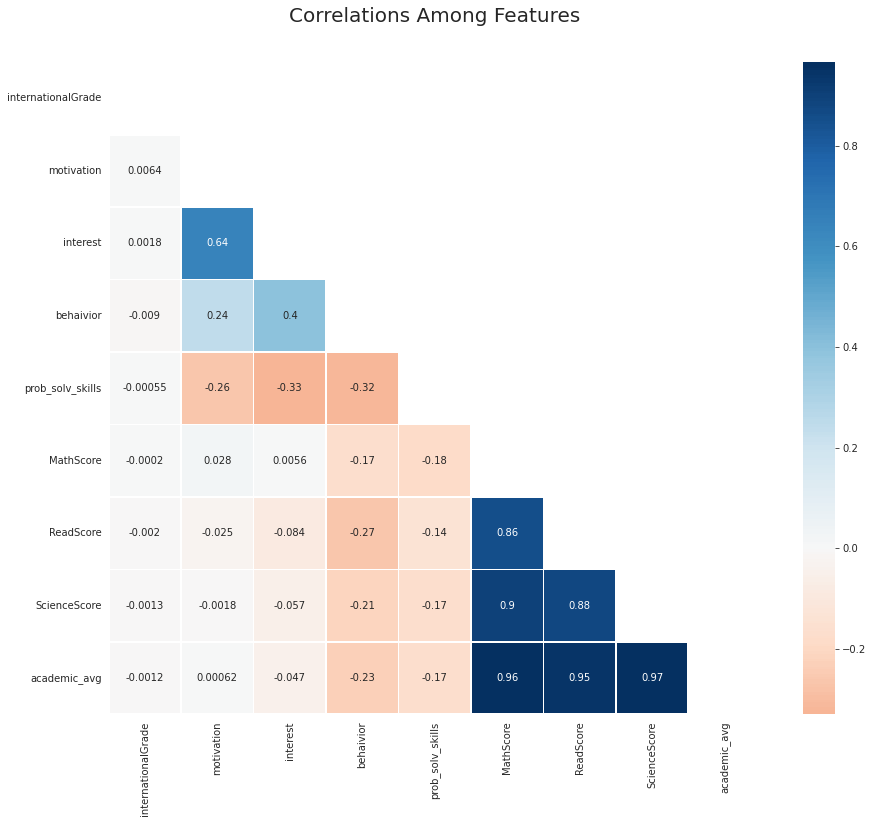

In [ ]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sb.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);
plt.savefig('correlations_feat.png')

we can point out from the plot correlations that are strong, the strogest correlation is between interest and motivation
we have a fairly strong relatioship between interest and behaivior too, as well as behaivior and motivation.
we can observe some abormally strong correlation with the performance scores(maths, science,read) thats a feature worth investigating

Next we move to investigate seemingly high correlation in the subset of performance scores

Text(0.5, 0.98, 'Nights in Mainland vs Nights in Tanzania vs Amount Spent')

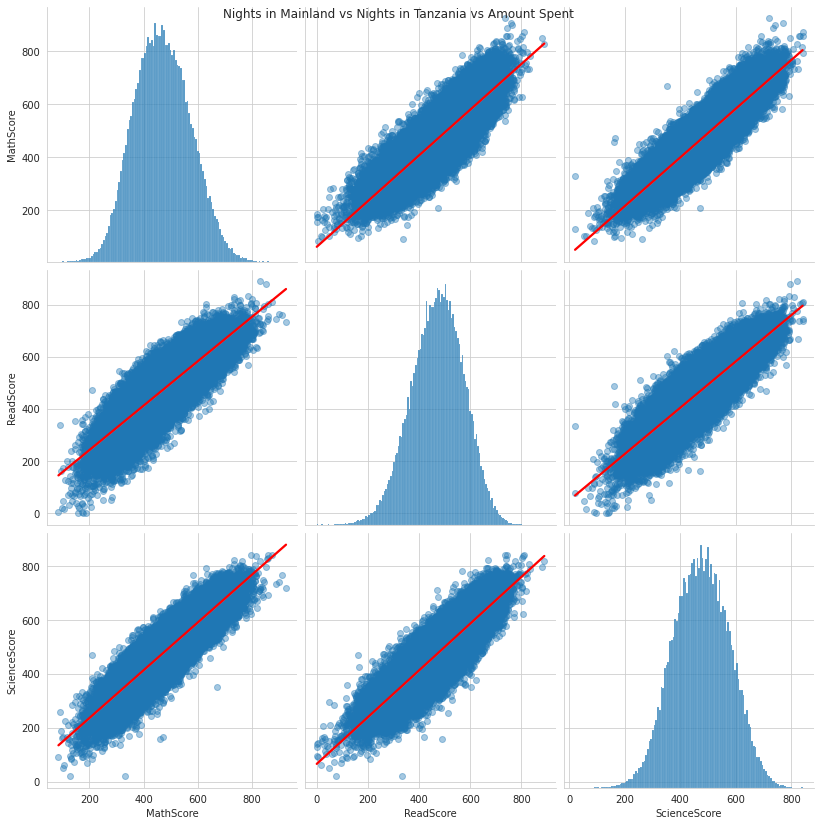

In [ ]:
#get subset of train dataset for analysis
pair = data[['MathScore', 'ReadScore', 'ScienceScore']]


#create pairplot of nght_mainland, night_zanzibar and total_cost
g = sb.pairplot(pair, kind='reg',  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})
g.fig.set_size_inches(12,12)
g.fig.suptitle('Math score vs Read score vs Science score')

from the plot, we can conclude from the high positive correlation between the features 
that a student who scores high in maths is also likely to score high in reading ad in science as well.
Lucky for us, we are not building a regression model, multicollinearity would have been a problem.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The next most significant relationships to academic performance are motivation, interest. The correlation map also shows why the quantitative variables must be separated into categorical groups for meaningful analysis, with a majority of the data showing insignificant to no correlation.


## Conclusions
>In this exploration, I found that the top performing students were majority males, they showed more interest in Maths and Sciences, while the female only edge males in reading.

>We can also see a pattern among the student drive towards math in the top performing students. As the top pecentile of students increases, the male students' average scores for motivation, behavior, perception of parent's attitude towards math, interest, was higher than the female students' average scores under these categories.

>A point worth of mention is that given the high scores of males we also noticed females edged out males in terms of problem solving skills, which begs further questions like since males scored higher on the other performance indexes, why is't this translated into their problem solving skills or ability?

>In conclusion, this Analysis requires further investigations, especially on the relationships between the variables

#Reference
- [Fabien Daniel 2015,Kaggle,Accessed November 9 2022](https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial)

- [Stackoverflow, Accessed 2022](https://stackoverflow.com)

- [Jade Maria, Github, Accessed 2022](https://github.com/cooljade007/communicate_data_findings/blob/master/pisa2012_Part1.ipynb)

- [Bruno de Assis, Github, Accessed 2022](https://github.com/brunoassisp/PISA-Data-Viz-project) 
